## Middleware part

In [1]:
mw=1
path_to_experiment="/home/skotti/data_from_cloud/long_data/experiment_7/fourth_copy/"
path_to_logs = "/home/skotti/data_from_cloud/long_data/experiment_7/fourth_copy/middleware1_logs/"

mw_log = open(path_to_experiment+"mw_"+str(mw)+".log","r")
lines = mw_log.readlines()

def is_zero(line):
    parts = line.split(" ")
    if (parts[1] == '0' and parts[2] == '0' and parts[3] == '0' and parts[4] == '0' and parts[5] == '0' and
        parts[6] == '0' and parts[7] == '0' and parts[8] == '0' and parts[9] == '0' and parts[10] == '0'):
        return True
    return False

def check_following_lines(i):
    all_zero = True
    
    n = 0
    for j in range(64):
        n = j
        parts = lines[i+j].split(" ")
        if parts[0] == str(j) and is_zero(lines[i+j]):
            continue
        elif j == 8 or j == 32:
            break
        else:
            all_zero = False
            break
        
    return all_zero, n

new_experiment_positions=[]
new_experiment_positions_end=[]
invalidated_experiments=[]

i = 0
while i < len(lines):
    parts = lines[i].split(" ")
    if is_zero(lines[i]) or lines[i].startswith("DEBUG ethz.StatPrinter") or lines[i].startswith("SIGTERM call"):
        i += 1
        continue
    new_experiment_positions.append(i)
    while True:
        if not is_zero(lines[i]):
            i += 1
        elif is_zero(lines[i]):
            condition, nlines = check_following_lines(i)
            if (condition):
                break
            else:
                print("line numer="+str(i))
                print("condition not ok")
                i+=1
                continue
    new_experiment_positions_end.append(i)

for i in range(len(new_experiment_positions)):
    for j in range(new_experiment_positions[i], new_experiment_positions_end[i]):
        if lines[j].startswith("ERROR"):
            print("Error in line="+str(j))
            print("Invalidate experiment="+str(i))
            invalidated_experiments.append(i)
        elif lines[j].startswith("SIGTERM"):
            print("Sigterm reported in "+ str(i)+".Check the data")
            
for i in range(len(new_experiment_positions)):
    if i not in invalidated_experiments:
        f = open(path_to_logs+"log_"+str(i)+".log", "w")
        for j in range(new_experiment_positions[i], new_experiment_positions_end[i]):
            if (lines[j][0].isdigit()):
                f.write(lines[j])
        f.close()

line numer=96989
condition not ok


In [2]:
#### v1
#ex1
#log1 log2 log3 log4 |w1|
#log5 log6 log7 log8 |w2|
#log9 log10 log11 log12 |w3|
#
#log13 log14 log15 log16 |w1|
#log17 log18 log19 log20 |w2|
#log21 log22 log23 log24 |w3|
#
#log25 log26 log27 log28 |w1|
#log29 log30 log31 log32 |w2|
#log33 log34 log35 log36 |w3|
#
#log37 log38 log39 log40 |w1|
#log41 log42 log43 log44 |w2|5534
#log45 log46 log47 log48 |w3|

logs_per_experiment = 36
path_to_logs = "/home/skotti/data_from_cloud/long_data/experiment_7/fourth_copy/middleware1_logs/"

value_sizes = [64, 256, 512, 1024]
client_numbers = [4, 8, 16, 32]
workers = [8, 32, 64]
repetitions = 3
memtier_instances = 3
nServers = 3
experiments = len(workers) * len(value_sizes) * len(client_numbers) * repetitions
ex = 36


import csv
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean

data=[]
k = 108
l = 0
for v in value_sizes:
    print("k="+str(k))
    for w in workers:
        for client in client_numbers:
            for rep in range(repetitions):
                data.append(pd.read_csv(path_to_logs+"log_"+str(k)+".log", header=None, delimiter=' '))
                for j in range(w):
                    d = data[l].index[data[l][0] == j].tolist()
                    data[l] = data[l].drop([d[0]])
                    data[l] = data[l].drop([d[len(d)-1]])
                k += 1
                l += 1
    k += logs_per_experiment * 3
        
global_data_6 = pd.DataFrame(columns=['Worker threads',
                                    'Value size',
                                    'Client number',
                                    'Repetition',
                                    'Worker thread',
                                    'Time1',
                                    'Time2',
                                    'Time3',
                                    'Time4',
                                    'Time5',
                                    'Queue size',
                                    'Left queue',
                                    'Successful',
                                    'Per server1',
                                    'Per server2',
                                    'Per server3',
                                    'Duration'])

print("Start adding data to global table")
k = 0
m = 0
for value_size in value_sizes:
    for w in workers:
        for n in client_numbers:
            for rep in range(repetitions):
                print("m="+str(m))
                for d in range (len(data[m])):
                    if nServers == 1:
                        newline = [w, value_size, n, rep, 
                             data[m].iloc[d, 0], 
                             data[m].iloc[d, 1],
                             data[m].iloc[d, 2], 
                             data[m].iloc[d, 3], 
                             data[m].iloc[d, 4], 
                             data[m].iloc[d, 5],
                             data[m].iloc[d, 6],
                             data[m].iloc[d, 7], 
                             data[m].iloc[d, 8],
                             data[m].iloc[d, 9], 0, 0, 5000]
                    elif nServers == 3:
                        newline = [w, value_size, n, rep, 
                             data[m].iloc[d, 0], 
                             data[m].iloc[d, 1],
                             data[m].iloc[d, 2], 
                             data[m].iloc[d, 3], 
                             data[m].iloc[d, 4], 
                             data[m].iloc[d, 5],
                             data[k].iloc[d, 6],
                             data[m].iloc[d, 7], 
                             data[m].iloc[d, 8], 
                             data[m].iloc[d, 9], 
                             data[m].iloc[d, 10],
                             data[m].iloc[d, 11], 5000]
                    global_data_6.loc[k] = newline
                    k += 1
                m += 1    


k=36
k=84
k=132
k=180
Start adding data to global table
m=0
m=1
m=2
m=3
m=4
m=5
m=6
m=7
m=8
m=9
m=10
m=11
m=12
m=13
m=14
m=15
m=16
m=17
m=18
m=19
m=20
m=21
m=22
m=23
m=24
m=25
m=26
m=27
m=28
m=29
m=30
m=31
m=32
m=33
m=34
m=35
m=36
m=37
m=38
m=39
m=40
m=41
m=42
m=43
m=44
m=45
m=46
m=47


Start drawing graphs


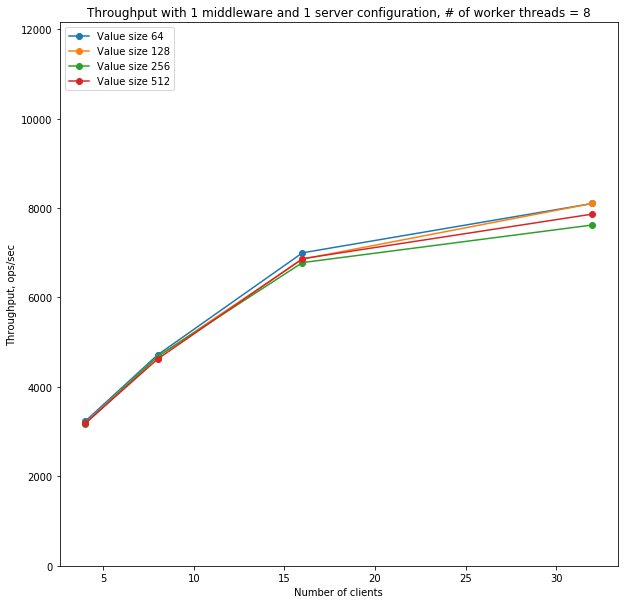

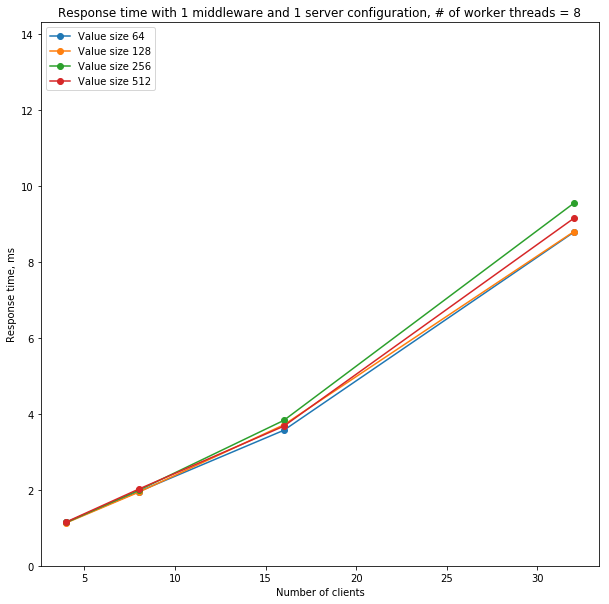

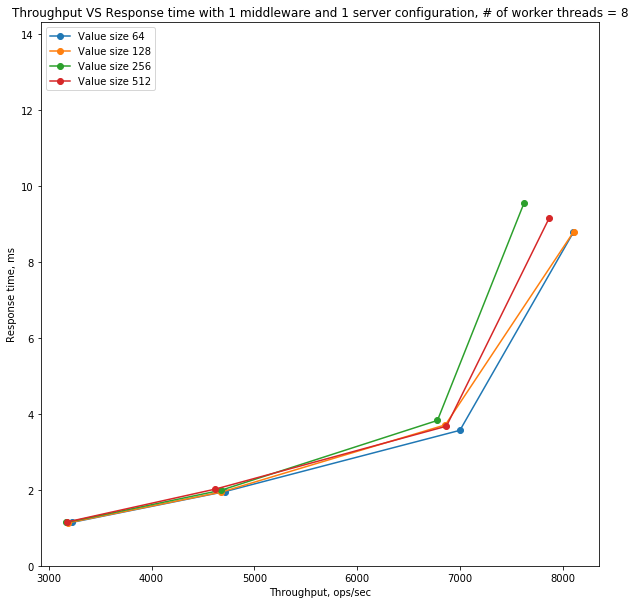

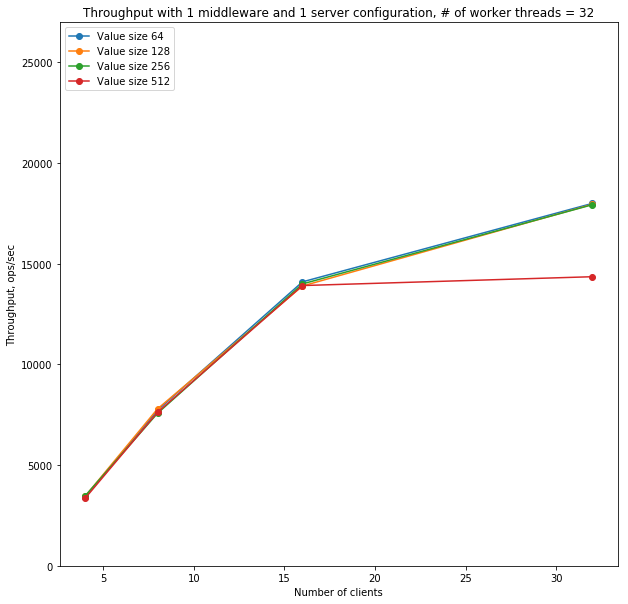

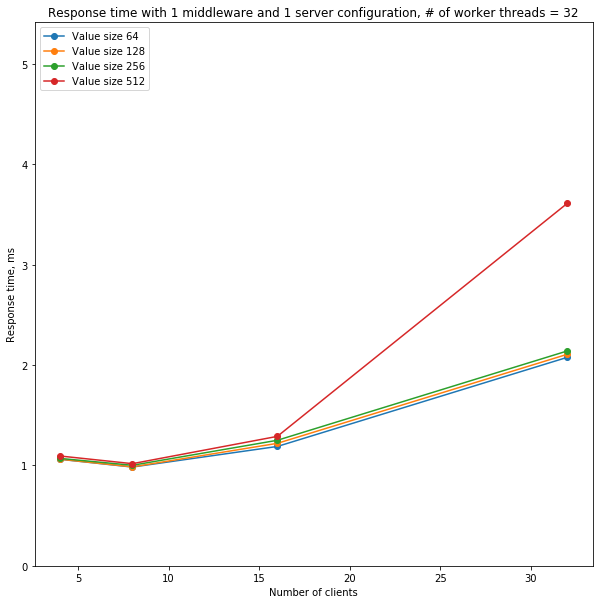

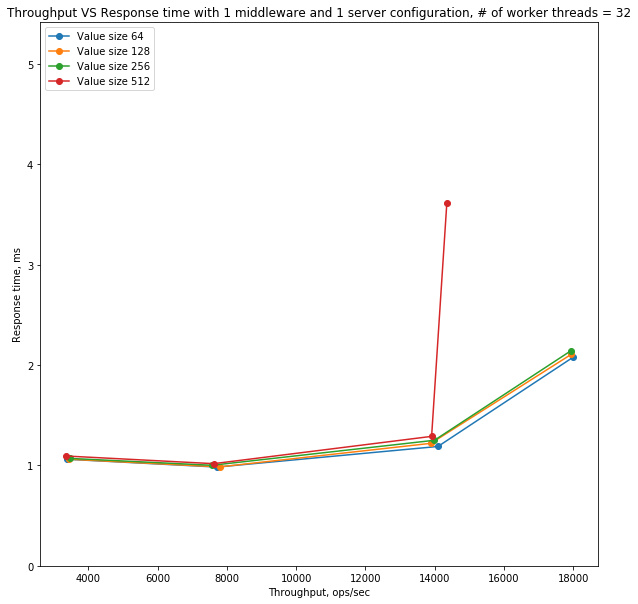

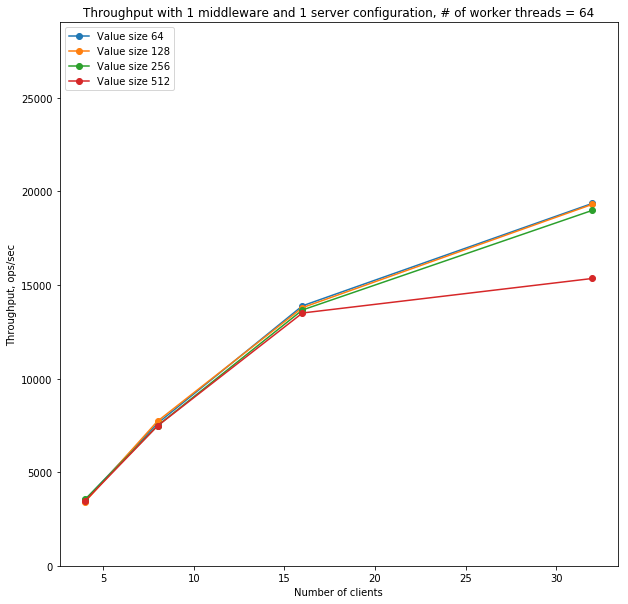

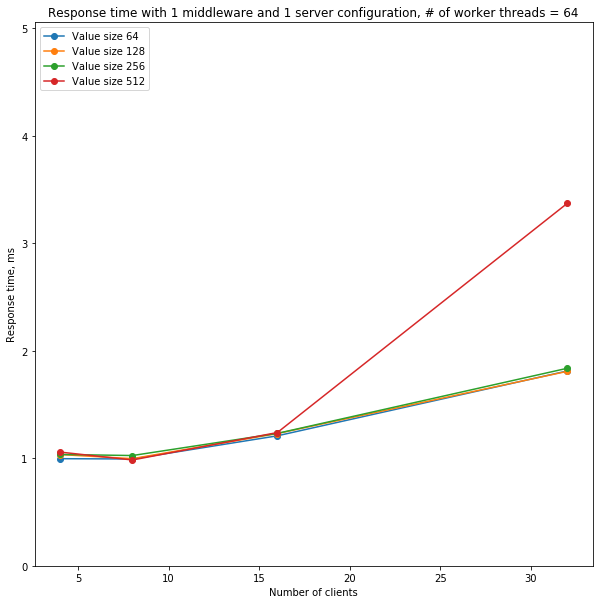

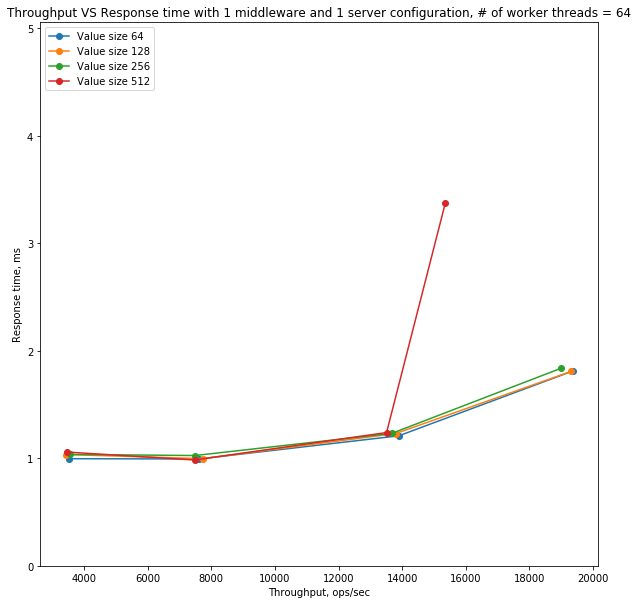

In [3]:
print("Start drawing graphs")
prefix="/home/skotti/asl-project-2019-ruzhanskaia/report_src/part6_mid_mid1_"
for w in workers:
    TR_overall = []
    RT_overall = []
    QT_overall = []
    ST_overall = []
    QS_overall = []
    PT_overall = []
    for value_size in value_sizes:
        TR = []
        RT = []
        QT = []
        ST = []
        QS = []
        PT = []
        TR_error = []
        RT_error = []
        X_axis = client_numbers
        for client_number in client_numbers:
            subset = global_data_6[(global_data_6['Worker threads'] == w) &
                                 (global_data_6['Value size'] == value_size) & 
                                 (global_data_6['Client number'] == client_number)]
            
            # for graphs
            groupped0 = subset.groupby(['Repetition']).sum()
            groupped1 = groupped0[[ 'Time5', 'Successful']].mean()
            RT.append(groupped1['Time5'] / groupped1['Successful'] / 1000000.0)
            
            groupped2 = subset.groupby(['Repetition', 'Worker thread']).sum()[['Successful', 'Duration']]
            groupped3 = groupped2['Successful'] / groupped2['Duration'] * 1000.0
            TR.append(groupped3.groupby(['Repetition']).sum().mean())
            
            '''groupped = subset.groupby(['Repetition']).sum()
            TR_std = np.std(groupped['TR'].values)
            TR_error.append(TR_std)
            TR.append(float(groupped.mean()['TR']))
            groupped1 = subset.groupby(['Repetition']).sum()
            groupped2 = groupped1['Total time']/groupped1['Total ops']
            RT.append(float(groupped2.mean()))
            RT_std = np.std(groupped2.values)
            RT_error.append(RT_std)'''
            
            # for formula checks
            # queue average time for all threads
            groupped4 = subset.groupby(['Repetition']).sum()
            groupped5 = groupped4[[ 'Time1', 'Successful']].mean()
            QT.append(groupped5['Time1'] / groupped5['Successful'] / 1000000.0)
            
            # average service time
            groupped6 = subset.groupby(['Repetition']).sum()
            groupped7 = groupped6[['Time3', 'Successful']].mean()
            ST.append(groupped7['Time3'] / groupped7['Successful'] / 1000000.0)
            
            # average process time
            groupped13 = subset.groupby(['Repetition']).sum()
            groupped14 = groupped13[['Time4', 'Successful']].mean()
            PT.append(groupped14['Time4'] / groupped14['Successful'] / 1000000.0)
            
            # average queue size
            groupped8 = subset.groupby(['Repetition']).sum()
            groupped9 = groupped8[['Queue size', 'Successful']].mean()
            QS.append(groupped9['Queue size'] / groupped9['Successful'])
            
            # TR per worker
            #groupped10 = subset.groupby(['Repetition', 'Worker thread']).sum()[['Successful', 'Duration']]
            #groupped11 = groupped10['Successful'] / groupped10['Duration'] * 1000.0    
            #groupped12 = groupped11.groupby(['Repetition']).mean().mean()
            #print(groupped12)
        TR_overall.append(TR)
        RT_overall.append(RT)
        QT_overall.append(QT)
        ST_overall.append(ST)
        QS_overall.append(QS)
        PT_overall.append(PT)
        
    plt.figure(figsize=(10, 10))
    plt.title("Throughput with 1 middleware and 1 server configuration, # of worker threads = "+str(w))
    max1 = 0
    for i in range(len(TR_overall)):
        plt.plot(X_axis, TR_overall[i], '-o',
                label="Value size "+str(value_sizes[i]))
        '''plt.errorbar(X_axis, TR_overall[i],
                yerr=TR_error_overall[i],
                fmt='-o',
                label="Value size "+str(value_sizes[i]))'''
        max2 = max(TR_overall[i]) + max(TR_overall[i])/2
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1)
    plt.ylabel('Throughput, ops/sec')
    plt.xlabel('Number of clients')
    plt.legend(loc="upper left")
    plt.savefig(prefix+str(w)+"_tr.png", dpi=300)
    plt.show()

    max1 = 0
    plt.figure(figsize=(10, 10))
    plt.title("Response time with 1 middleware and 1 server configuration, # of worker threads = "+str(w))
    for i in range(len(RT_overall)):
        plt.plot(X_axis, RT_overall[i], '-o',
                label="Value size "+str(value_sizes[i]))
        '''plt.errorbar(X_axis, RT_overall[i],
                yerr=RT_error_overall[i],
                fmt='-o',
                label="Value size "+str(value_sizes[i]))'''
        max2 = max(RT_overall[i]) + max(RT_overall[i])/2
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1) 
    plt.ylabel('Response time, ms')
    plt.xlabel('Number of clients') 
    plt.legend(loc="upper left")
    plt.savefig(prefix+str(w)+"_rt.png", dpi=300) 
    plt.show()

    max1 = 0
    plt.figure(figsize=(10, 10))
    plt.title("Throughput VS Response time with 1 middleware and 1 server configuration, # of worker threads = "+str(w))
    for i in range(len(RT_overall)):
        plt.plot(TR_overall[i], RT_overall[i], '-o',
                label="Value size "+str(value_sizes[i]))
        '''plt.errorbar(TR_overall[i], RT_overall[i],
                xerr=TR_error_overall[i],
                yerr=RT_error_overall[i],
                fmt='-o',
                label="Value size "+str(value_sizes[i]))'''
        max2 = max(RT_overall[i]) + max(RT_overall[i])/2
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1)
    plt.ylabel('Response time, ms')
    plt.xlabel('Throughput, ops/sec') 
    plt.legend(loc="upper left")
    plt.savefig(prefix+str(w)+"_rttr.png", dpi=300) 
    plt.show()

## Client part

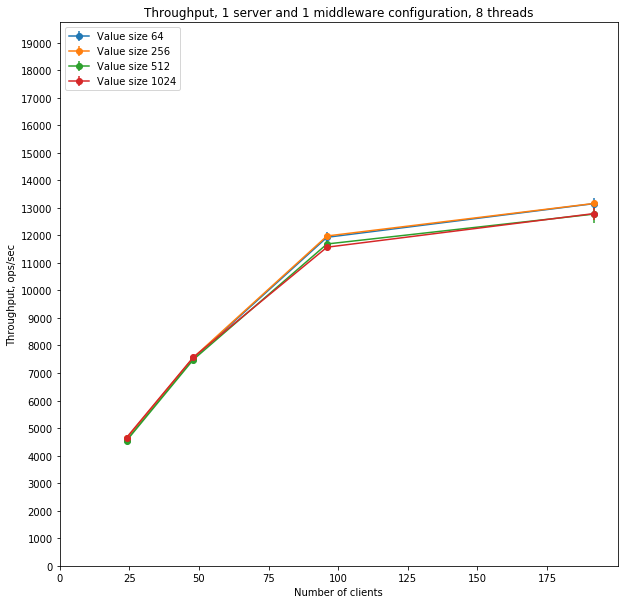

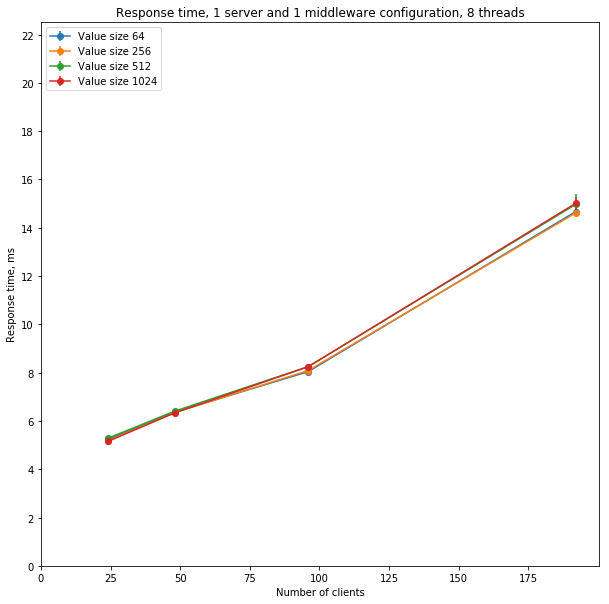

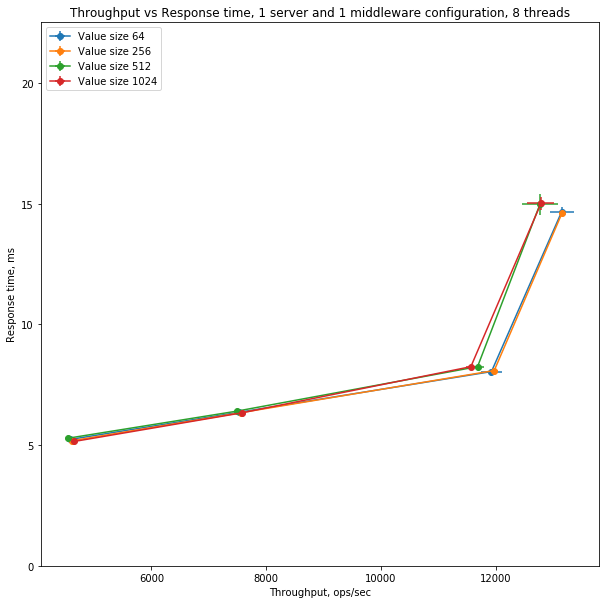

[4581.920000000001, 7536.803333333333, 11928.733333333332, 13152.839999999998]
[5.231052329117066, 6.362417494435238, 8.043405201499352, 14.66471307755925]
[0.006926509448424767, 0.006330352242465587, 0.004389758569056212, -0.06710526054026467]
0.04714021522159051
0.03502057723050237
0.0689719570422906


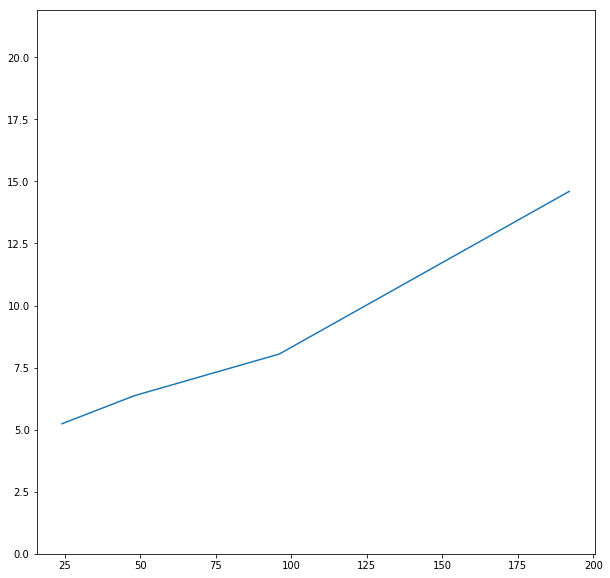

[4624.0, 7561.703333333334, 11976.69, 13159.606666666667]
[5.183127663721613, 6.341336610110413, 8.086565876221423, 14.610457587167952]
[0.0071837549635089815, 0.006439530274181315, -0.07099563102011963, -0.020355856670432715]
0.048258706099533345
0.03635894304397937
0.06795720532235967


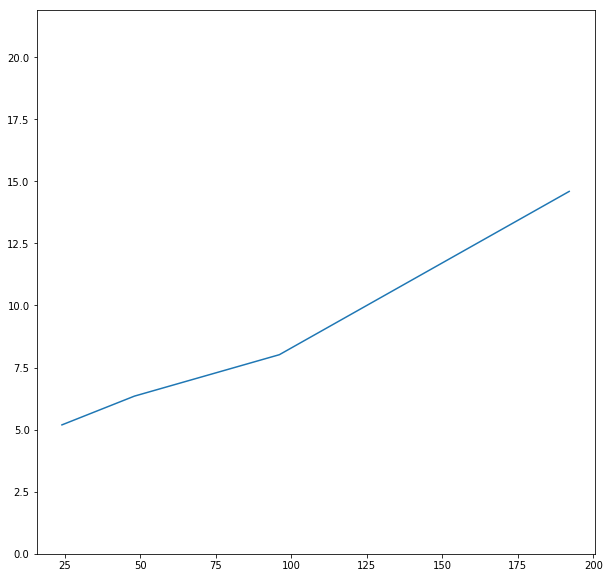

[4541.066666666667, 7487.926666666666, 11686.356666666667, 12773.033333333333]
[5.2813600572456805, 6.4041189411881385, 8.24838880950814, 14.965710210223259]
[0.0037418277739913464, 0.006200248191388091, -0.0336814598836348, 0.06595807008603849]
0.04678162016426909
0.03842228892333338
0.06997209792411581


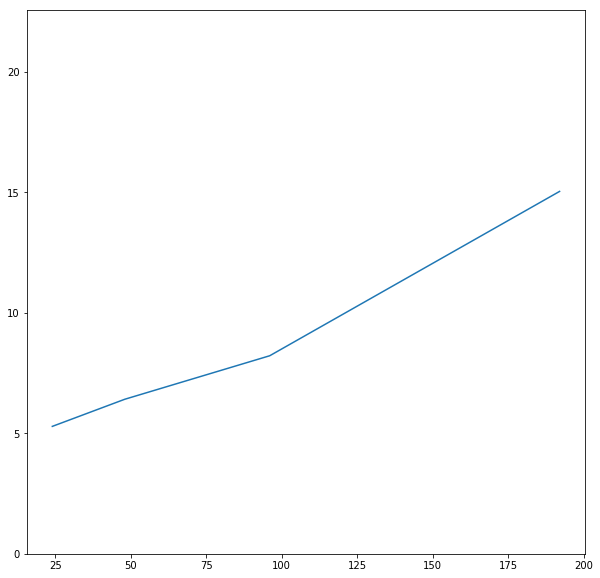

[4654.45, 7572.723333333332, 11569.43, 12791.61]
[5.1491626627494735, 6.33222830617169, 8.245781680858594, 15.008877384741718]
[0.007193082827340547, 0.006310405353050719, 0.051947766486694746, 0.0009610953245111631]
0.049294401809259036
0.039865695305977146
0.07044891358211587


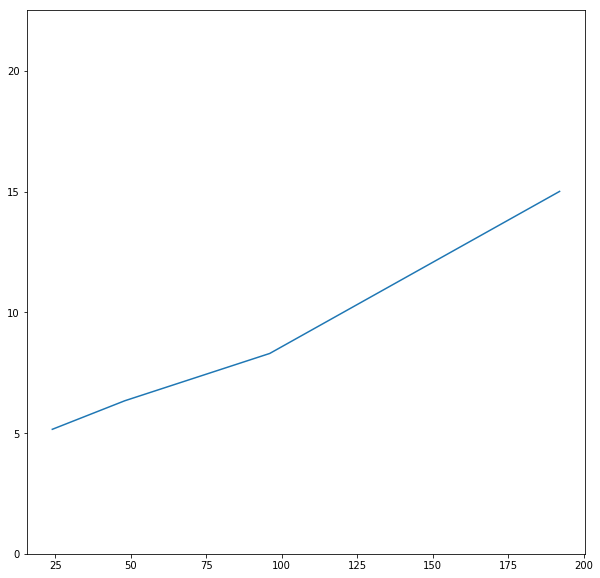

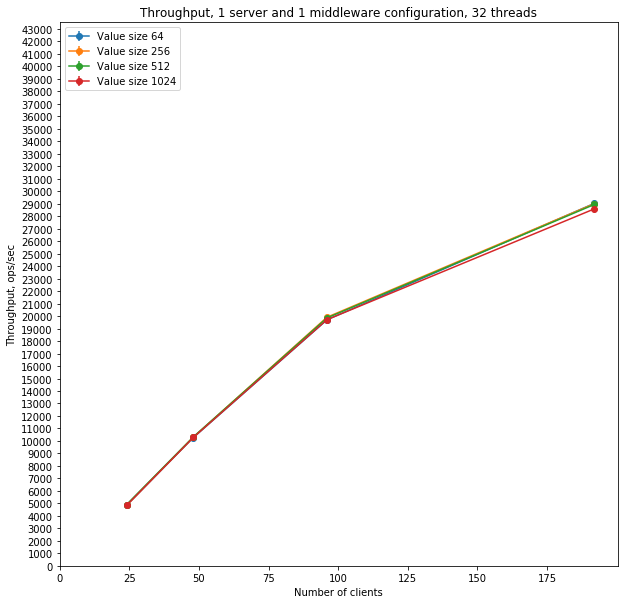

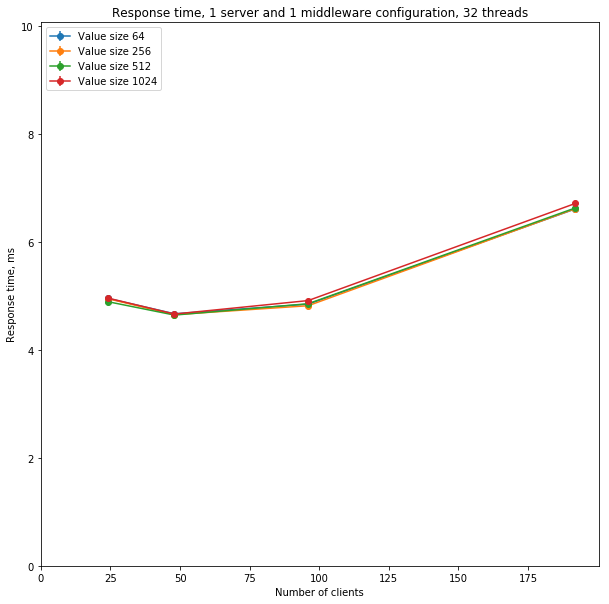

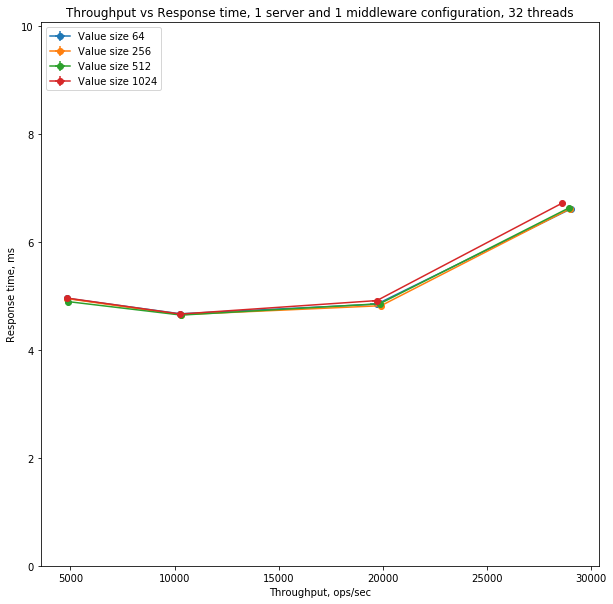

[4838.626666666667, 10271.636666666667, 19702.86, 29023.936666666665]
[4.953606483750383, 4.6673992819207895, 4.845087446736005, 6.610322207805048]
[0.006478609264990887, 0.005663206335706938, 0.027301637894347586, 0.004907221788755578]
-0.011925300076233047
0.003701836766983657
0.018387862094469198


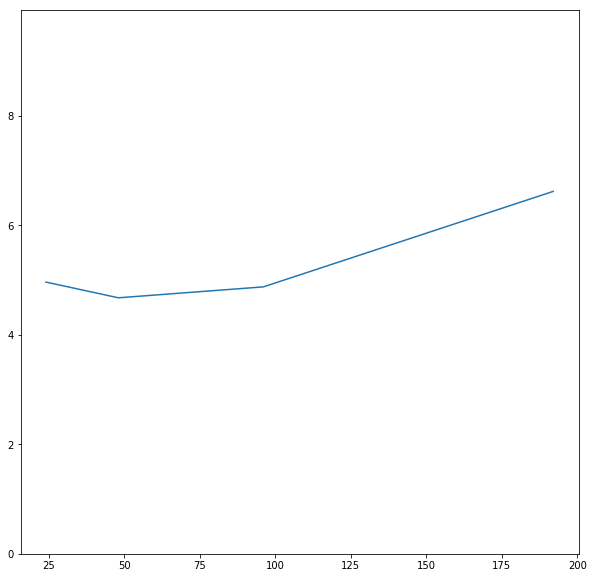

[4843.463333333334, 10305.476666666667, 19909.62, 29001.5]
[4.94820253377657, 4.651743304997851, 4.816547751573732, 6.614977323518031]
[0.006929434463786244, 0.005974290468378385, 0.005241915933734909, 0.005369899901446651]
-0.012352467865779962
0.003433425970330861
0.01873364137441978


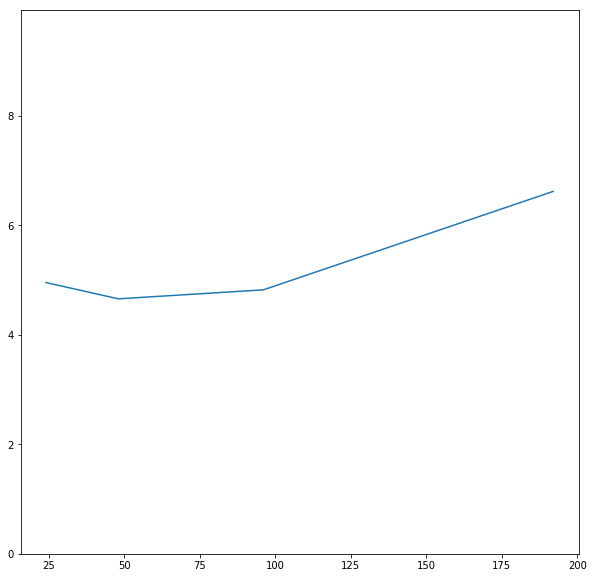

[4898.836666666667, 10324.296666666667, 19853.89, 28937.096666666668]
[4.892347788668122, 4.643474580253961, 4.853506228987627, 6.628666238841997]
[0.006774519961613379, 0.005752534167715595, -0.018181766124178544, 0.0064154423540774275]
-0.010369717017256716
0.004375659348618055
0.01849125010264968


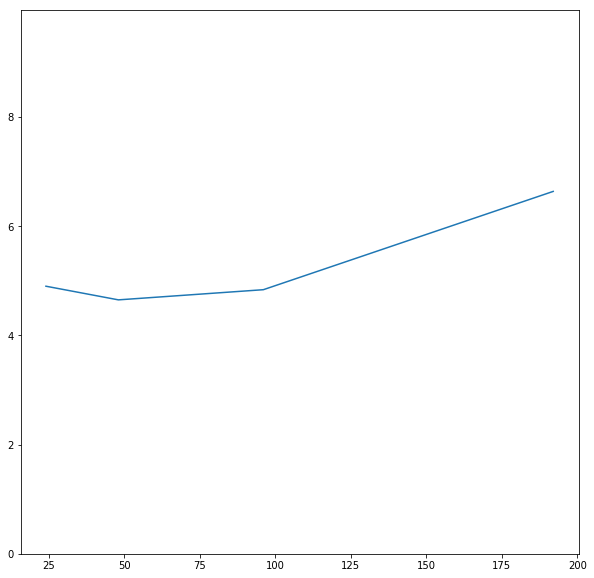

[4832.889999999999, 10281.163333333332, 19712.016666666663, 28583.930000000004]
[4.959431927369853, 4.6628137122202435, 4.911986018393713, 6.711812359018513]
[0.006540813578109983, 0.005918652372739253, -0.0418602659973315, 0.005248590962821709]
-0.012359092297900406
0.005191089711947279
0.018748191048175


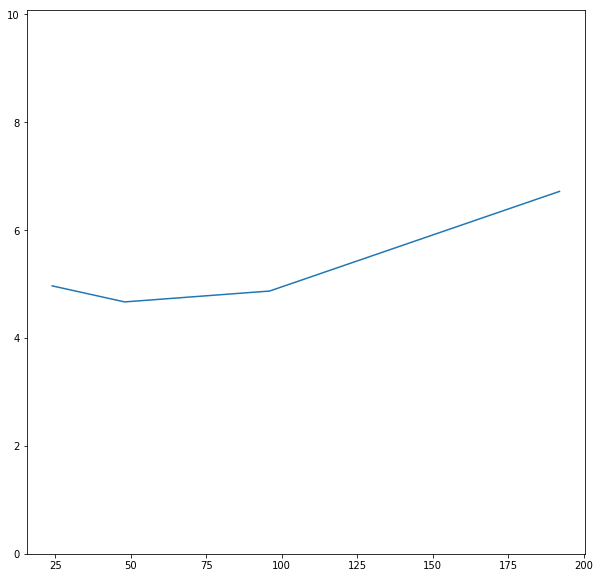

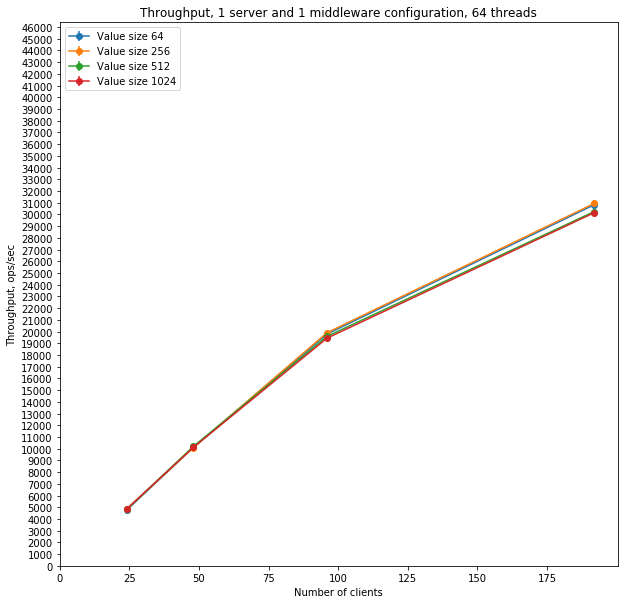

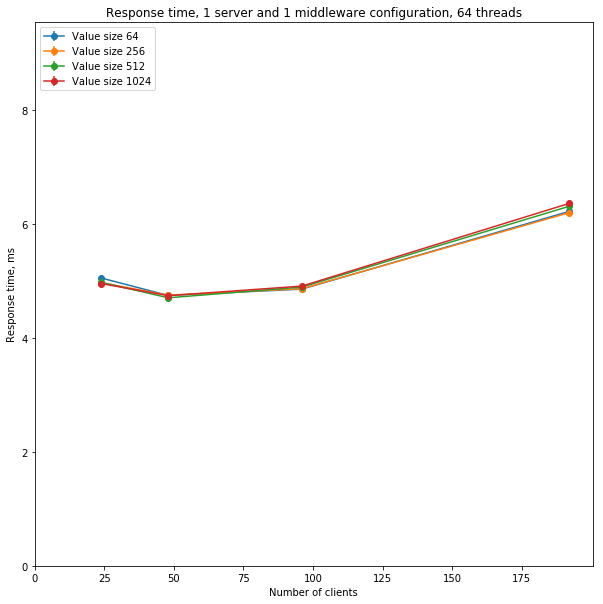

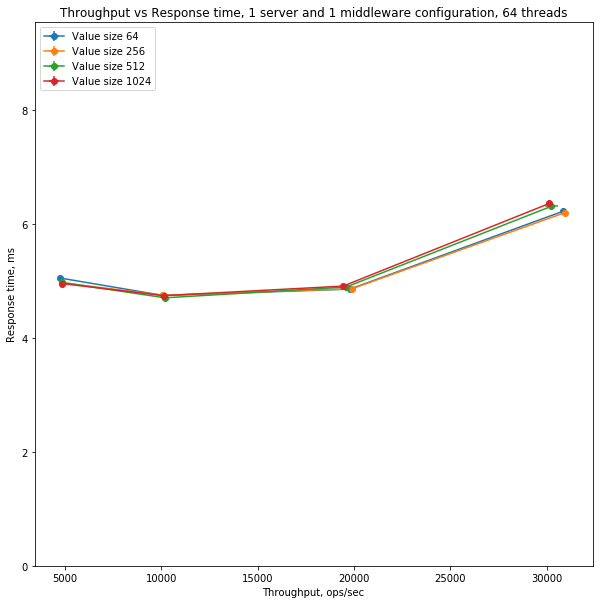

[4743.256666666667, 10099.766666666668, 19787.443333333333, 30827.246666666662]
[5.052951860053806, 4.746886068030552, 4.858827410899738, 6.223162794093567]
[0.006862880451485864, 0.005698975188267674, -0.007265822936462385, 0.0050937244364703815]
-0.012752741334302264
0.002332111309774713
0.014211826908269054


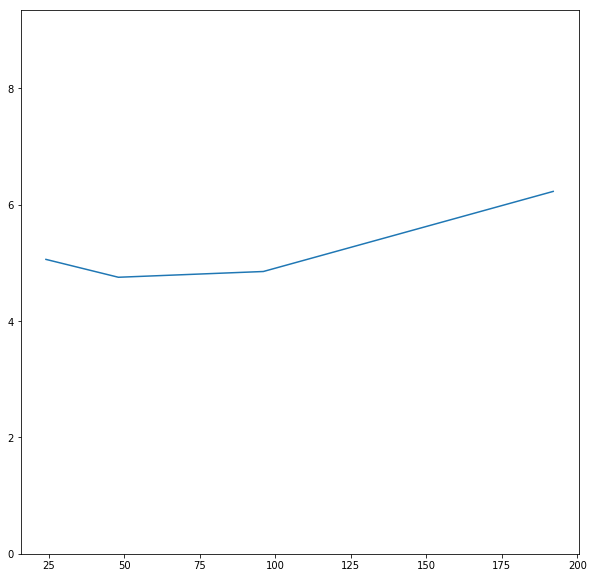

[4820.849999999999, 10091.073333333334, 19899.22333333334, 30939.460000000003]
[4.971481768583279, 4.75121691886453, 4.8656002859986165, 6.200429619687017]
[0.00689341421643519, 0.005462416865200659, -0.04129139756126321, 0.0052378354010800265]
-0.009177702071614538
0.0023829868152934752
0.013904472225920839


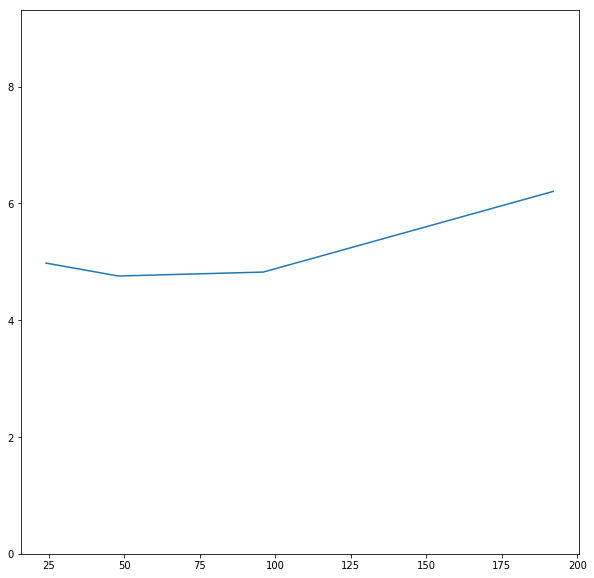

[4815.576666666667, 10186.893333333333, 19584.44, 30245.626666666667]
[4.976901234882123, 4.706080964784371, 4.894914374982268, 6.3131328795480925]
[0.006925554986586313, 0.005856073265829487, 0.006936277882965136, 0.03489231153187333]
-0.011284177920739694
0.003934029379122868
0.014773109422560668


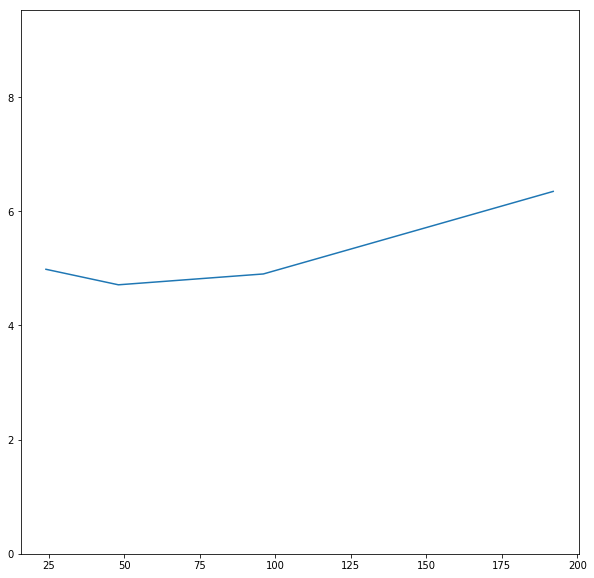

[4836.546666666668, 10106.203333333333, 19432.606666666667, 30146.266666666663]
[4.955332934137428, 4.743971990214474, 4.911528860292811, 6.363827220891079]
[0.006885287679238239, 0.0055861194745912, 0.02862156042618036, 0.005120620079831717]
-0.008806705996789751
0.0034907681266320156
0.015128107922898629


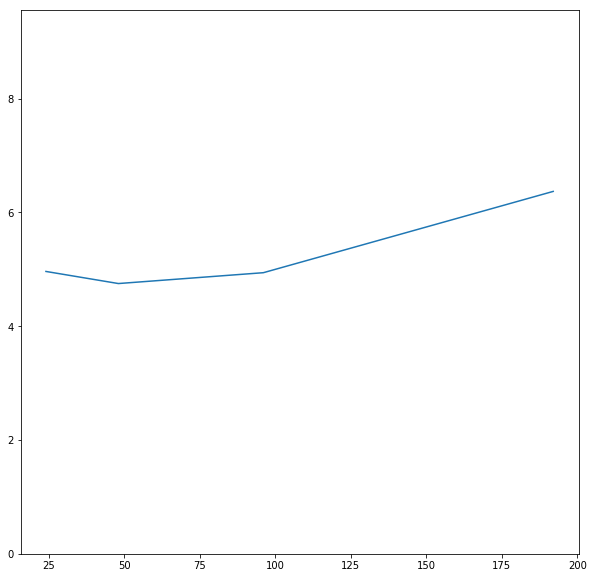

In [2]:
path_to_experiment="/home/skotti/data_from_cloud/long_data/experiment_7/fourth_copy/part6/"
value_sizes=[64, 256, 512, 1024]
client_numbers=[4, 8, 16, 32]
workers = [8, 32, 64]
repetitions = 3
memtier_instances = 6
experiments = len(workers) * len(value_sizes) * len(client_numbers) * repetitions
prefix="/home/skotti/asl-project-2019-ruzhanskaia/report_src/part6_mid_cl_"


import csv
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean 
import re
import numpy as np


clients_data = []

for i in range(memtier_instances):
    initial = open(path_to_experiment+"client"+str(i+1)+".log","r")
    lines = initial.readlines()
    total_ops = 0
    for line in lines:
        if line.startswith("[RUN #1 100%"):
            line = re.sub(' +', ' ', line)
            parts = line.split(' ')
            total_ops = parts[7]
        if line.startswith("Gets"):
            line = re.sub(' +', ' ', line)
            parts = line.split(' ')
            parts = [parts[1], parts[4], total_ops]
            clients_data.append(parts) 
    initial .close()


global_data = pd.DataFrame(columns=['Worker threads', 'Value size', 'Client number', 'Repetition', 'Memtier instance', 'TR', 'RT', 'Total ops'])

j = 0
k = 0
for value_size in value_sizes:
    for w in workers:
        for n in client_numbers:
            for rep in range(repetitions):
                for memtier in range(memtier_instances):
                    d = [w, value_size, n, rep, memtier, clients_data[memtier * experiments + k][0], clients_data[memtier * experiments + k][1], clients_data[memtier * experiments + k][2]]
                    global_data.loc[j] = d
                    j += 1
                k += 1

global_data['Worker threads'] = global_data['Worker threads'].astype(int)
global_data['Value size'] = global_data['Value size'].astype(int)
global_data['Client number'] = global_data['Client number'].astype(int)
global_data['Repetition'] = global_data['Repetition'].astype(int)
global_data['Memtier instance'] = global_data['Memtier instance'].astype(int)
global_data['TR'] = global_data['TR'].astype(float)
global_data['RT'] = global_data['RT'].astype(float)
global_data['Total ops'] = global_data['Total ops'].astype(int)

global_data['Total time'] = global_data['RT']*global_data['Total ops']

TR_graph = []
X_axis =[i * 6 for i in client_numbers]

for w in workers:
    TR_overall = []
    RT_overall = []
    TR_error_overall = []
    RT_error_overall = []
    for value_size in value_sizes:
        TR = []
        RT = []
        TR_error = []
        RT_error = []
        '''for memtier in range(memtier_instances):
            TR_client = []
            RT_client = []
            for client_number in client_numbers:
                subset = global_data[ (global_data['Value size'] == value_size) & 
                                 (global_data['Client number'] == client_number) &
                                 (global_data['Memtier instance'] == memtier)]

                groupped = subset.groupby(["Repetition"]).mean()
                groupped1 = subset.groupby(["Repetition"]).mean()
                TR_client.append(groupped.mean()['TR'])
                RT_client.append(groupped.mean()['RT'])'''

        for client_number in client_numbers:
            subset = global_data[(global_data['Worker threads'] == w) &
                                 (global_data['Value size'] == value_size) & 
                                 (global_data['Client number'] == client_number)]
            groupped = subset.groupby(['Repetition']).sum()
            TR_std = np.std(groupped['TR'].values)
            TR_error.append(TR_std)
            TR.append(float(groupped.mean()['TR']))
            groupped1 = subset.groupby(['Repetition']).sum()
            groupped2 = groupped1['Total time']/groupped1['Total ops']
            RT.append(float(groupped2.mean()))
            RT_std = np.std(groupped2.values)
            RT_error.append(RT_std)
        TR_overall.append(TR)
        RT_overall.append(RT)
        TR_error_overall.append(TR_error)
        RT_error_overall.append(RT_error)

    plt.figure(figsize=(10, 10))
    plt.title("Throughput, 1 server and 1 middleware configuration, "+str(w) + " threads")
    max1 = 0
    for i in range(len(TR_overall)):
        plt.errorbar(X_axis, TR_overall[i],
                yerr=TR_error_overall[i],
                fmt='-o',
                label="Value size "+str(value_sizes[i]))
        max2 = max(TR_overall[i]) + max(TR_overall[i])/2
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1)
    plt.xticks(np.arange(0, max(X_axis), 25))
    plt.yticks(np.arange(0, max1, 1000))
    plt.ylabel('Throughput, ops/sec')
    plt.xlabel('Number of clients')
    plt.legend(loc="upper left")
    plt.savefig(prefix+str(w)+"_tr.png", dpi=300)
    plt.show()

    max1 = 0
    plt.figure(figsize=(10, 10))
    plt.title("Response time, 1 server and 1 middleware configuration, "+str(w) + " threads")
    for i in range(len(RT_overall)):
        plt.errorbar(X_axis, RT_overall[i],
                yerr=RT_error_overall[i],
                fmt='-o',
                label="Value size "+str(value_sizes[i]))
        max2 = max(RT_overall[i]) + max(RT_overall[i])/2
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1)
    plt.xticks(np.arange(0, max(X_axis), 25))
    plt.yticks(np.arange(0, max1, 2))
    plt.ylabel('Response time, ms')
    plt.xlabel('Number of clients') 
    plt.legend(loc="upper left")
    plt.savefig(prefix+str(w)+"_rt.png", dpi=300) 
    plt.show()

    max1 = 0
    plt.figure(figsize=(10, 10))
    plt.title("Throughput vs Response time, 1 server and 1 middleware configuration, "+str(w) + " threads")
    for i in range(len(RT_overall)):
        plt.errorbar(TR_overall[i], RT_overall[i],
                xerr=TR_error_overall[i],
                yerr=RT_error_overall[i],
                fmt='-o',
                label="Value size "+str(value_sizes[i]))
        max2 = max(RT_overall[i]) + max(RT_overall[i])/2
        if max2 > max1:
            max1 = max2
    plt.ylim(0, max1)
    plt.ylabel('Response time, ms')
    plt.xlabel('Throughput, ops/sec') 
    plt.legend(loc="upper left")
    plt.savefig(prefix+str(w)+"_rttr.png", dpi=300) 
    plt.show()
    
    for i in range(len(TR_overall)):
        print(TR_overall[i])
        print(RT_overall[i])
        print([(1/t) * 1000 * c - r1 for t, c, r1 in zip(TR_overall[i], X_axis, RT_overall[i])])
        for j in range(len(TR_overall[i]) - 1):
            print((RT_overall[i][j+1]-RT_overall[i][j])/(X_axis[j+1]-X_axis[j]))
        RT_Z = [(1/t) * 1000 * c for t, c in zip(TR_overall[i], X_axis)]
        plt.figure(figsize=(10,10))
        plt.plot(X_axis, RT_Z)
        plt.ylim(0, max(RT_Z) + max(RT_Z)/2)
        plt.show()